In [1]:
# Measuring the performance of a buy and hold strategy - Volatility

# Import necesary libraries
import yfinance as yf
import numpy as np
import datetime as dt

In [17]:
# Download historical data for required stocks
ticker = "AMZN"
SnP = yf.download(ticker,dt.date.today()-dt.timedelta(1825),dt.datetime.today())

[*********************100%***********************]  1 of 1 completed


In [18]:
def volatility(DF):
    "function to calculate annualized volatility of a trading strategy"
    df = DF.copy()
    df["daily_ret"] = df["Adj Close"].pct_change()
    vol = df["daily_ret"].std() * np.sqrt(252)
    return vol

In [19]:
DF = SnP.copy()
DF

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-05-05,673.309998,676.489990,656.000000,659.090027,659.090027,4884100
2016-05-06,656.049988,676.950012,656.010010,673.950012,673.950012,4365300
2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200
2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600
2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200
...,...,...,...,...,...,...
2021-04-28,3434.800049,3489.879883,3425.000000,3458.500000,3458.500000,4631900
2021-04-29,3505.100098,3514.449951,3435.000000,3471.310059,3471.310059,7682400
2021-04-30,3525.120117,3554.000000,3462.500000,3467.419922,3467.419922,7001800


In [20]:
volatility(DF)

0.291098454779917

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-04-14  3404.040039  3404.129883  3326.000000  3333.000000  3333.000000   
2021-04-15  3371.000000  3397.000000  3352.000000  3379.090088  3379.090088   
2021-04-16  3380.000000  3406.800049  3355.590088  3399.439941  3399.439941   
2021-04-19  3390.330078  3435.929932  3360.159912  3372.010010  3372.010010   
2021-04-20  3373.600098  3382.989990  3316.000000  3334.689941  3334.689941   
2021-04-21  3316.000000  3362.860107  3303.810059  3362.020020  3362.020020   
2021-04-22  3371.679932  3372.870117  3301.449951  3309.040039  3309.040039   
2021-04-23  3319.100098  3375.000000  3308.500000  3340.879883  3340.879883   
2021-04-26  3348.000000  3428.449951  3330.939941  3409.000000  3409.000000   
2021-04-27  3443.469971  3460.000000  3398.010010  3417.429932  3417.429932   
2021-04-28  3434.800049  3489.879883  3425.000000  3

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

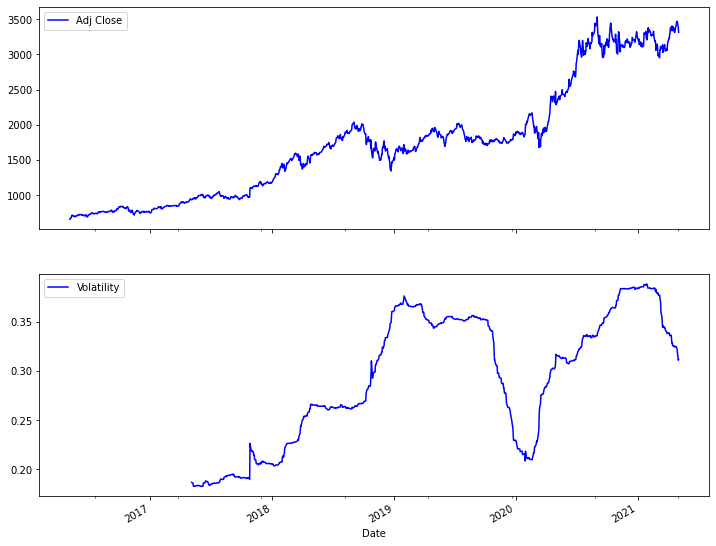

In [21]:
# Compute the logarithmic returns using the Closing price 
DF['Log_Ret'] = np.log(DF["Adj Close"] / DF["Adj Close"].shift(1))   # daily_return

# Compute Volatility using the pandas rolling standard deviation function
DF['Volatility'] = DF['Log_Ret'].rolling(window=252).std() * np.sqrt(252)
print(DF.tail(15))

# Plot the GOOGLE Price series and the Volatility
DF[['Adj Close', 'Volatility']].plot(subplots=True, color='blue',figsize=(12, 10))